### Library

In [1]:
using Plots, Measures

In [2]:
include("main.jl")

test7 (generic function with 1 method)

In [3]:
function PlotLine(points::Matrix{Int64}; color::Int64=1, ls=:solid)
    plot(points[:,1], points[:,2], points[:,3], color = color, ls=ls, lw=2,
    zlim=(-2,2), xlim=(-2,2), ylim=(-2,2),aspect_ratio=:equal,legend= false, showaxis = false, ticks = false,
     size = (300,300))
end
function PlotLine!(points::Matrix{Int64}; color::Int64=1, ls=:solid)
    plot!(points[:,1], points[:,2], points[:,3], color = color, ls=ls, lw=2)
end

PlotLine! (generic function with 1 method)

In [4]:
function background()
    points = [1 1 1; 1 -1 1; -1 -1 1; -1 1 1; 1 1 1]
    PlotLine(points)
    points = [1 1 -1; 1 -1 -1; -1 -1 -1]
    PlotLine!(points)
    points = [ -1 1 -1; 1 1 -1]
    PlotLine!(points, ls=:dash)
    points = [ -1 1 -1; -1 -1 -1]
    PlotLine!(points, ls=:dash)
    points = [1 1 -1; 1 1 1]
    PlotLine!(points)
    points = [1 -1 -1; 1 -1 1]
    PlotLine!(points)
    points = [-1 1 -1; -1 1 1]
    PlotLine!(points, ls=:dash)
    points = [-1 -1 -1; -1 -1 1]
    PlotLine!(points)
    
    points1 = [1 1 1; 1 1 -1; 1 -1 1; 1 -1 -1; -1 1 1; -1 1 -1; -1 -1 1; -1 -1 -1]
    points2 = [2 0 0; 0 2 0; 0 0 2; -2 0 0; 0 -2 0; 0 0 -2]
    points = vcat(points1, points2)
    scatter!(points[:,1], points[:,2], points[:,3], mc=:white)
    scatter!([0], [0], [0], mc=:black)
    end

background (generic function with 1 method)

In [5]:
function PlotNeighborCoords(coords::Matrix{Int32})
    background()
    scatter!(coords[:,1], coords[:,2], coords[:,3])
end

PlotNeighborCoords (generic function with 1 method)

In [6]:
function PlotNeighborCondition(point::Point)
    deltas = Matrix{Int32}(undef, 0, 3)
    for neighbor in point.neighbors
        coord = neighbor.coord
        delta = coord - point.coord
        deltas = vcat(deltas, delta')
    end
    PlotNeighborCoords(deltas)
end

PlotNeighborCondition (generic function with 1 method)

### Test

In [7]:
Random.seed!(1234)
mapSize = Vector{UInt32}([300,300,300])
universe = Universe(mapSize)
fileName = "/mnt/c/Users/xuke/Desktop/test6.dump"
RefreshFile(fileName)
test7(universe)

Initialization completed!


In [ ]:
point = universe.points[20]

In [ ]:
point.neighbors

In [ ]:
c = point.object.vacMigrationCondition

In [ ]:
PlotNeighborCondition(point)

In [11]:
a = Weights([1,2,4,8])

4-element Weights{Int64, Int64, Vector{Int64}}:
 1
 2
 4
 8

In [17]:
out = sample([1,2,3,4], a, 1000)

1000-element Vector{Int64}:
 4
 2
 1
 2
 4
 3
 3
 2
 4
 4
 ⋮
 4
 4
 2
 3
 1
 4
 4
 4
 2

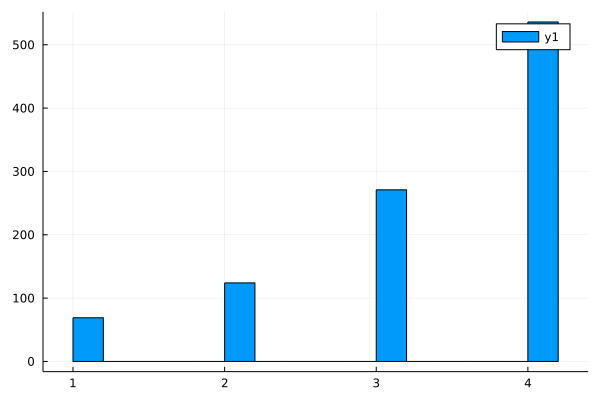

In [18]:
histogram(out)